## 사용할 모듈 미리 로딩

In [80]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib as mpl
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import time
import platform
import numpy as np
import random
import os
import shutil
from PIL import Image
import collections
if not hasattr(collections, 'Callable'):
    collections.Callable = collections.abc.Callable


from sqlalchemy.sql import text as Text
from sqlalchemy import create_engine
from sqlalchemy import engine

plt.rcParams['axes.unicode_minus']	=	False	
mpl.rc('font', family='Malgun Gothic')

# 데이터베이스(선택) 및 유저 에이전트

In [15]:

header = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

sqlinfo = engine.URL.create(
    drivername='mysql+pymysql',
    username = 'KMS',
    password = '1234Q1@',
    database = 'numpyproject',
    query = {'charset':'utf8mb4'},
    host = "114.201.240.47",
    port = 33063,
)

conn = create_engine(sqlinfo,connect_args={'ssl':{"fake_flag_to_enable_tls":True}})
# cur 사용시 Text 로 쿼리문을 묶어 사용
# cur = conn.connect()
# result = cur.execute(Text('select * from Stocks_Test'))
# for row in result.fetchall():
#     print(row)


## 폰트 설정

In [16]:
plt.rcParams['axes.unicode_minus']	=	False	
mpl.rc('font', family='Malgun Gothic')


## sql 판다스 연동하기

In [17]:
# 해당 구문을 활용하여 sql 에서 읽어보세요
# pd.read_sql('select * from Stocks_Test', conn)

In [18]:
# 해당 구문을 활용하여 sql로 전송해주세요
# sqldf = pd.read_sql('select * from Stocks_Test', conn)
# sqldf.to_sql('editors_copied'+str(random.randint(100,1000)), conn, if_exists='replace', index=False)

# 데이터 불러오기
- 강수 : df_rain
- 풍속 : df_wind
- 습도 : df_hum

In [19]:
df = pd.read_csv("data.csv", encoding="utf-8", index_col="일시")
df

,평균기온(°C),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),평균운량(1/10)
일시,,,,,
1907년 10월,13.9,76.0,47.0,2.2,4.2
1907년 11월,5.3,77.0,54.4,2.7,5.8
1907년 12월,-3.9,68.0,25.2,3.0,3.8
1908년 1월,-3.5,71.0,18.2,2.3,5.7
1908년 2월,-4.0,63.0,29.1,2.9,4.2
...,...,...,...,...,...
2023년 8월,27.2,76.0,298.1,2.2,6.5
2023년 9월,23.7,74.0,134.5,2.0,6.2
2023년 10월,15.8,67.0,31.0,1.9,3.7


In [20]:
df.info()
# 봄/여름 non 데이터는 삭제하기

<class 'pandas.core.frame.DataFrame'>
Index: 1380 entries, 1907년 10월 to 2023년 12월
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   평균기온(°C)            1356 non-null   float64
 1   평균상대습도(%)           1356 non-null   float64
 2   월합강수량(00~24h만)(mm)  1380 non-null   float64
 3   평균풍속(m/s)           1356 non-null   float64
 4   평균운량(1/10)          1356 non-null   float64
dtypes: float64(5)
memory usage: 64.7+ KB


In [21]:
# 빈부분은 drop
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1356 entries, 1907년 10월 to 2023년 12월
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   평균기온(°C)            1356 non-null   float64
 1   평균상대습도(%)           1356 non-null   float64
 2   월합강수량(00~24h만)(mm)  1356 non-null   float64
 3   평균풍속(m/s)           1356 non-null   float64
 4   평균운량(1/10)          1356 non-null   float64
dtypes: float64(5)
memory usage: 63.6+ KB


---


In [22]:
df.columns

Index(['평균기온(°C)', '평균상대습도(%)', '월합강수량(00~24h만)(mm)', '평균풍속(m/s)',
       '평균운량(1/10)'],
      dtype='object')

In [23]:
arr = df["평균기온(°C)"]
min_val = arr.min()
min_val

-9.1

In [25]:
norm_list = []
index = df.index
for col in df.columns:
    # 배열 내 값 정규화
    arr = df[col]
    min_val = arr.min()
    max_val = arr.max()
    normalized_arr = (arr - min_val) / (max_val - min_val)
    norm_list.append(list(normalized_arr))
    # print("Normalized Array:", normalized_arr)

norm_df = pd.DataFrame({"평균기온":norm_list[0], "평균상대습도":norm_list[1], "월합강수량":norm_list[2], "평균풍속":norm_list[3], "평균운량":norm_list[4]}, index=index)
norm_df

,평균기온,평균상대습도,월합강수량,평균풍속,평균운량
일시,,,,,
1907년 10월,0.606860,0.717391,0.034452,0.363636,0.291667
1907년 11월,0.379947,0.739130,0.039877,0.515152,0.513889
1907년 12월,0.137203,0.543478,0.018472,0.606061,0.236111
1908년 1월,0.147757,0.608696,0.013341,0.393939,0.500000
1908년 2월,0.134565,0.434783,0.021331,0.575758,0.291667
...,...,...,...,...,...
2023년 8월,0.957784,0.717391,0.218516,0.363636,0.611111
2023년 9월,0.865435,0.673913,0.098593,0.303030,0.569444
2023년 10월,0.656992,0.521739,0.022724,0.272727,0.222222


# 그래프 추이 보기

In [26]:
norm_df.columns

Index(['평균기온', '평균상대습도', '월합강수량', '평균풍속', '평균운량'], dtype='object')

# 상관관계 분석

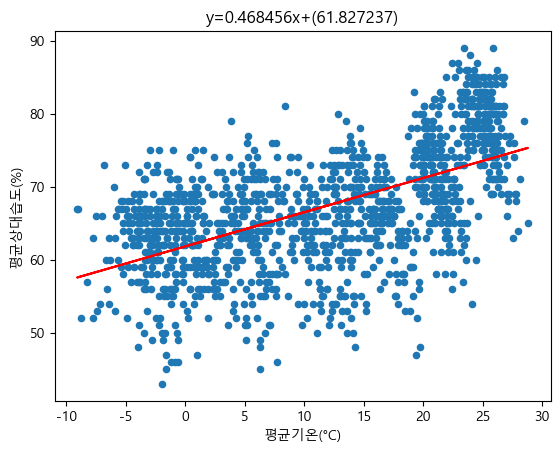

In [27]:
df.plot(kind='scatter', x='평균기온(°C)', y="평균상대습도(%)")
fit_weight = np.polyfit(df['평균기온(°C)'], df['평균상대습도(%)'], 1) # 1차식으로 피팅한다.
trend_f = np.poly1d(fit_weight)
              
plt.plot(df['평균기온(°C)'], trend_f(df['평균기온(°C)']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.show()

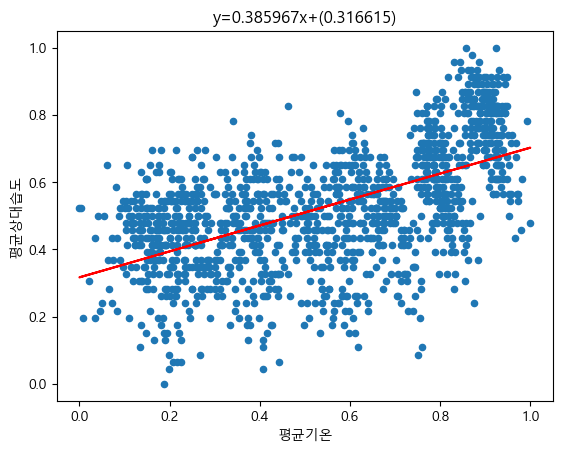

In [28]:
norm_df.plot(kind='scatter', x='평균기온', y="평균상대습도")
fit_weight = np.polyfit(norm_df['평균기온'], norm_df['평균상대습도'], 1) # 1차식으로 피팅한다.
trend_f = np.poly1d(fit_weight)
# 
plt.plot(norm_df['평균기온'], trend_f(norm_df['평균기온']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.show()

<Axes: >

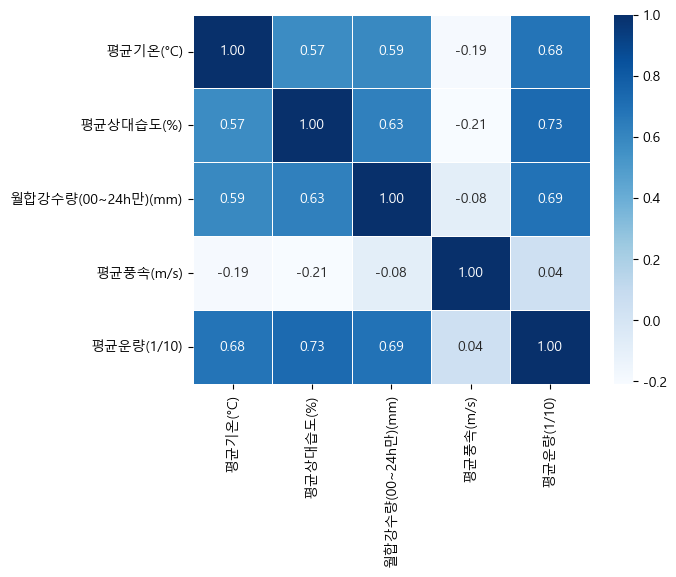

In [29]:
import seaborn as sb
sb.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [149]:
df.columns

Index(['평균기온(°C)', '평균상대습도(%)', '월합강수량(00~24h만)(mm)', '평균풍속(m/s)',
       '평균운량(1/10)'],
      dtype='object')

Pearson 상관 계수: 0.5722850291455398, p-value: 8.337249479222567e-119

                            OLS Regression Results                            
Dep. Variable:               평균기온(°C)   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     659.4
Date:                Thu, 22 Feb 2024   Prob (F-statistic):          8.34e-119
Time:                        13:31:30   Log-Likelihood:                -4795.5
No. Observations:                1356   AIC:                             9595.
Df Residuals:                    1354   BIC:                             9606.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

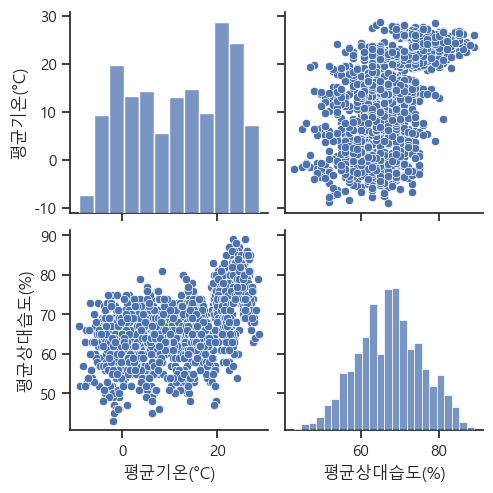

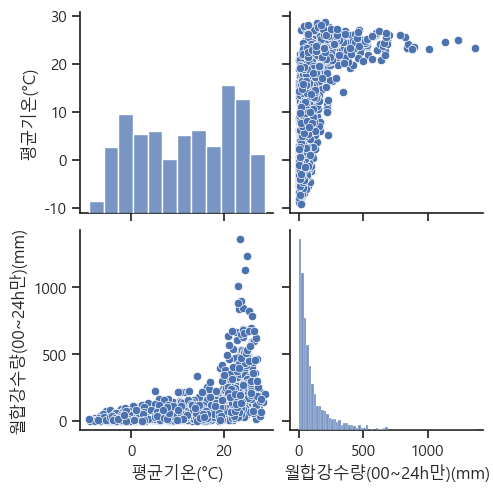

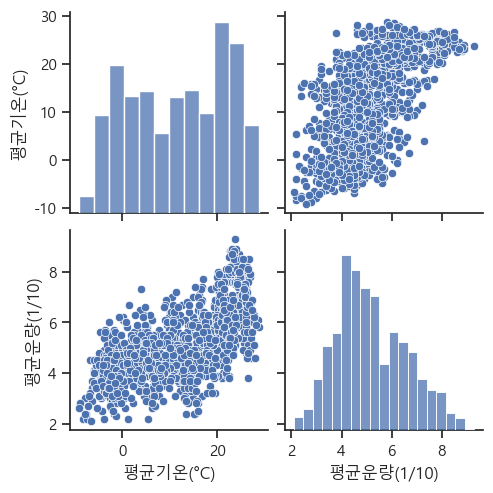

In [166]:
from scipy.stats import pearsonr
import statsmodels.api as sm

for col in df.columns[1:]:
    if col == "평균풍속(m/s)":
        continue
    # 데이터프레임에서 강수량과 습도 컬럼 선택
    pair_df = pd.DataFrame({'평균기온(°C)': df["평균기온(°C)"], f'{col}': df[col]})
    
    # 상관 분석
    correlation, p_value = pearsonr(pair_df['평균기온(°C)'], pair_df[col])
    print(f"Pearson 상관 계수: {correlation}, p-value: {p_value}")
    print()
    
    # 산점도 행렬
    ax = sns.pairplot(pair_df[['평균기온(°C)', col]])
    #ax.axes[1,0].set_xlim((0,1))
    #ax.axes[1,0].set_ylim((0,1.5))
    #ax.axes[0,1].set_ylim((0,1.5))
    #ax.axes[1,2].set_xlim((-20,20))

    # 회귀 분석
    X = sm.add_constant(pair_df[col])
    model = sm.OLS(pair_df['평균기온(°C)'], X).fit()
    print(model.summary())
    print("\n\n\n\n")
    

In [174]:
# 회귀 계수와 상수항
m =  0.6991 # 평균운량(1/10)의 회귀 계수
b =  -35.3314  # 상수항(const)

평균기온 = 30
습도 = (평균기온 - b) / m

print(f"평균기온이 {평균기온}일 때의 습도: {습도}")

평균기온이 30일 때의 습도: 93.45072235731655


In [175]:
# 회귀 계수와 상수항
m = 0.0405  # 평균운량(1/10)의 회귀 계수
b =  7.2371  # 상수항(const)

강수량 = (평균기온 - b) / m

print(f"평균기온이 {평균기온}일 때의 강수량: {강수량}")

평균기온이 30일 때의 강수량: 562.046913580247


In [176]:
# 회귀 계수와 상수항
m = 4.9201  # 평균운량(1/10)의 회귀 계수
b = -13.7778  # 상수항(const)

운량 = (평균기온 - b) / m

print(f"평균기온이 {평균기온}일 때의 운량: {운량}")

평균기온이 30일 때의 운량: 8.897745980772749


Pearson 상관 계수: 0.5722850291455391, p-value: 8.337249479227715e-119

                            OLS Regression Results                            
Dep. Variable:               평균기온(°C)   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     659.4
Date:                Thu, 22 Feb 2024   Prob (F-statistic):          8.34e-119
Time:                        13:26:43   Log-Likelihood:                 133.44
No. Observations:                1356   AIC:                            -262.9
Df Residuals:                    1354   BIC:                            -252.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

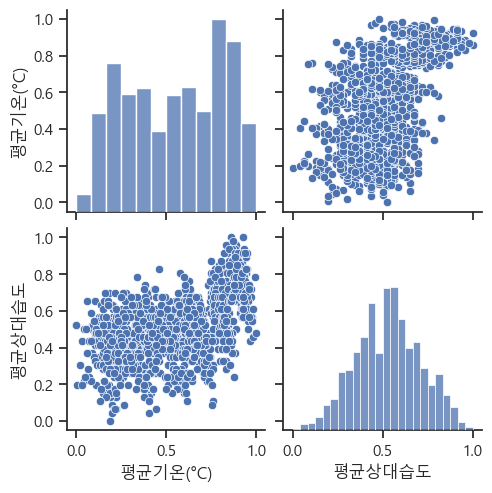

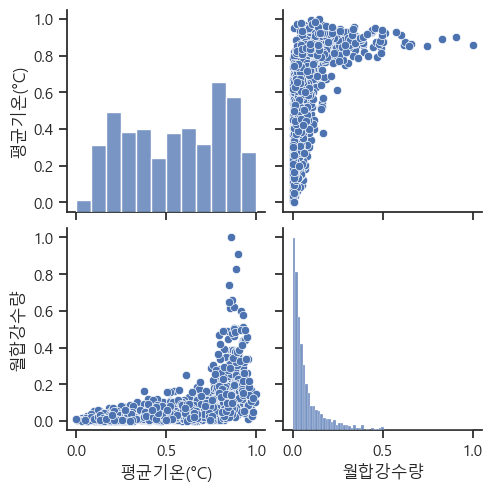

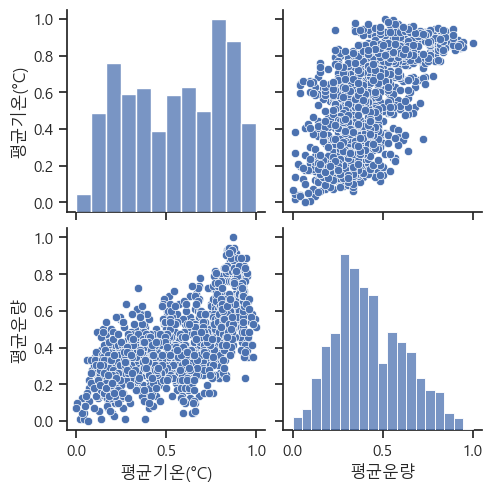

In [165]:
from scipy.stats import pearsonr
import statsmodels.api as sm

for col in norm_df.columns[1:]:
    if col == "평균풍속":
        continue
    # 데이터프레임에서 강수량과 습도 컬럼 선택
    pair_df = pd.DataFrame({'평균기온(°C)': norm_df["평균기온"], f'{col}': norm_df[col]})
    
    # 상관 분석
    correlation, p_value = pearsonr(pair_df['평균기온(°C)'], pair_df[col])
    print(f"Pearson 상관 계수: {correlation}, p-value: {p_value}")
    print()
    
    # 산점도 행렬
    ax = sns.pairplot(pair_df[['평균기온(°C)', col]])
    #ax.axes[1,0].set_xlim((0,1))
    #ax.axes[1,0].set_ylim((0,1.5))
    #ax.axes[0,1].set_ylim((0,1.5))
    #ax.axes[1,2].set_xlim((-20,20))
    
    # 회귀 분석
    X = sm.add_constant(pair_df[col])
    model = sm.OLS(pair_df['평균기온(°C)'], X).fit()
    print(model.summary())
    print("\n\n\n\n")
    

# 비만 보자... 여름만...

In [67]:
df_rain = pd.read_csv("강수일수_계절.csv", encoding="cp949", index_col="연도")
df_rain

,봄,여름,가을,겨울
연도,,,,
1907,NaN,NaN,18,26
1908,24.0,37.0,20,19
1909,22.0,48.0,27,28
1910,18.0,44.0,25,27
1911,28.0,50.0,38,21
...,...,...,...,...
2019,17.0,39.0,23,29
2020,20.0,46.0,20,18
2021,35.0,34.0,25,21


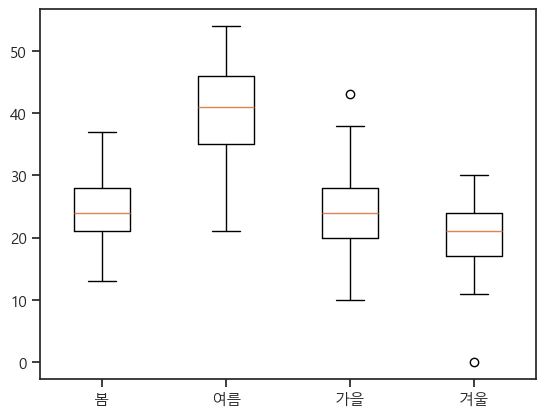

In [93]:
fig, ax = plt.subplots()
ax.boxplot([df_rain['봄'], df_rain['여름'], df_rain['가을'], df_rain['겨울']])
plt.xticks([1, 2, 3, 4],["봄", "여름", "가을", "겨울"])
# plt.boxplot(df_rain['여름'])
# plt.boxplot(df_rain['가을'])
# plt.boxplot(df_rain['겨울'])
plt.show()

In [68]:
df_rain.drop(index=[1907, 1951],axis=1,inplace=True)
df_rain

,봄,여름,가을,겨울
연도,,,,
1908,24.0,37.0,20,19
1909,22.0,48.0,27,28
1910,18.0,44.0,25,27
1911,28.0,50.0,38,21
1912,25.0,40.0,18,19
...,...,...,...,...
2019,17.0,39.0,23,29
2020,20.0,46.0,20,18
2021,35.0,34.0,25,21


In [78]:
df_rain.reset_index(inplace=True)
df_rain

,연도,봄,여름,가을,겨울
0,1908,24.0,37.0,20,19
1,1909,22.0,48.0,27,28
2,1910,18.0,44.0,25,27
3,1911,28.0,50.0,38,21
4,1912,25.0,40.0,18,19
...,...,...,...,...,...
110,2019,17.0,39.0,23,29
111,2020,20.0,46.0,20,18
112,2021,35.0,34.0,25,21
113,2022,20.0,45.0,18,18


In [130]:
df_rain.sort_values("겨울").head(1)
# df_rain.drop(index=[1907, 1951],axis=1)

,연도,봄,여름,가을,겨울
42,1950,16,37,10,0


In [131]:
df_rain.sort_values("가을").tail(1)

,연도,봄,여름,가을,겨울
63,1972,26,34,43,22


In [133]:
df_rain.drop(index=[42, 63],axis=1,inplace=True)

In [109]:
df_rain["봄"] = df_rain["봄"].astype("int8")
df_rain["여름"] = df_rain["여름"].astype("int8")

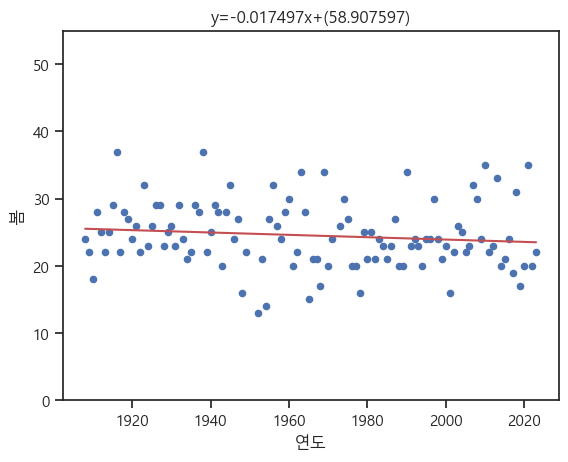

In [145]:
df_rain.plot(kind='scatter', x='연도', y="봄")
fit_weight = np.polyfit(df_rain['연도'], df_rain['봄'], 1) # 1차식으로 피팅한다.
trend_f = np.poly1d(fit_weight)
              
plt.plot(df_rain['연도'], trend_f(df_rain['연도']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.ylim(0, 55)
plt.show()

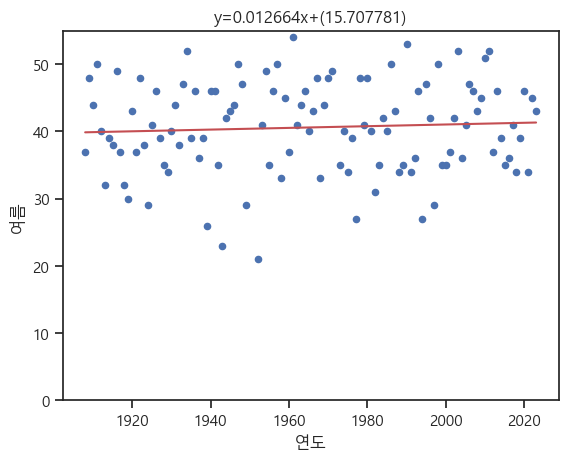

In [144]:
df_rain.plot(kind='scatter', x='연도', y="여름")
fit_weight = np.polyfit(df_rain['연도'], df_rain['여름'], 1) # 1차식으로 피팅한다.
trend_f = np.poly1d(fit_weight)
              
plt.plot(df_rain['연도'], trend_f(df_rain['연도']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.ylim(0, 55)
plt.show()

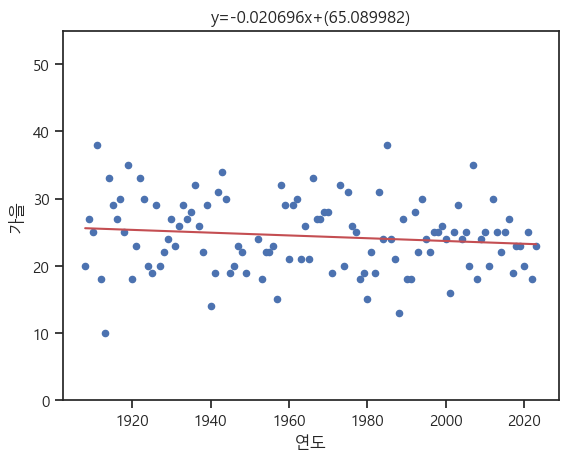

In [143]:
df_rain.plot(kind='scatter', x='연도', y="가을")
fit_weight = np.polyfit(df_rain['연도'], df_rain['가을'], 1) # 1차식으로 피팅한다.
trend_f = np.poly1d(fit_weight)
              
plt.plot(df_rain['연도'], trend_f(df_rain['연도']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.ylim(0, 55)
plt.show()

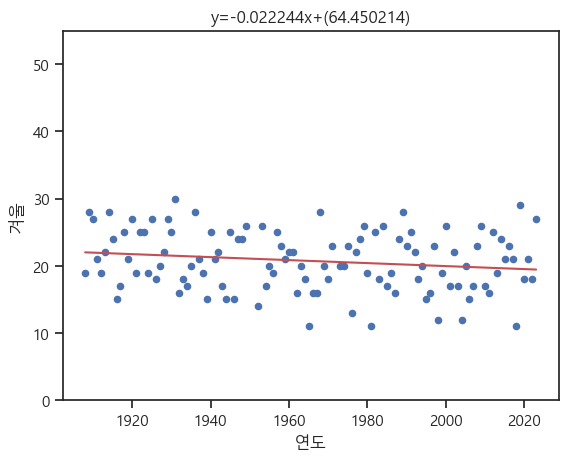

In [142]:
df_rain.plot(kind='scatter', x='연도', y="겨울")
fit_weight = np.polyfit(df_rain['연도'], df_rain['겨울'], 1) # 1차식으로 피팅한다.
trend_f = np.poly1d(fit_weight)
              
plt.plot(df_rain['연도'], trend_f(df_rain['연도']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.ylim(0, 55)
plt.show()

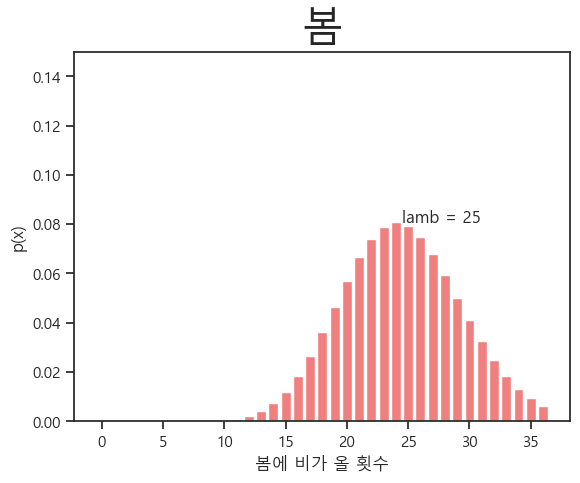

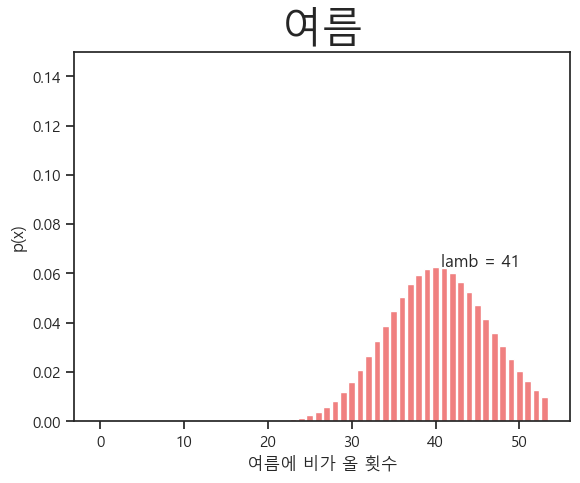

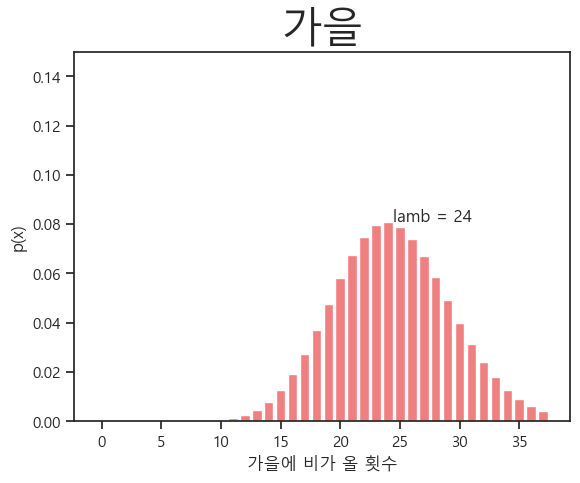

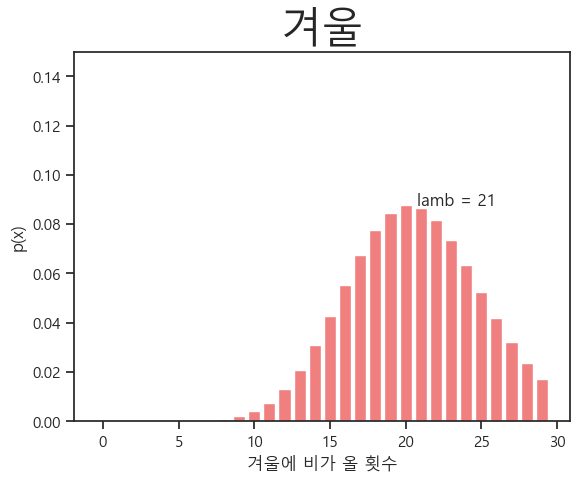

In [141]:
# 포아송 분포를 살펴보자
# 
from math import factorial, exp

# Probability density of the Poisson distribution
def pois_dist(n, lamb):
    pd = (lamb ** n) * exp(-lamb) / factorial(n)
    return pd
    
for col in df_rain.columns[1:]:
    lamb = df_rain[col].mean() # 기대값 
    x = np.arange(df_rain[col].max())
    pd1 = np.array([pois_dist(n, lamb) for n in range(df_rain[col].max())])
    plt.ylim(0, 0.15)
    plt.ylabel("p(x)")
    plt.xlabel(f"{col}에 비가 올 횟수")
    plt.text(lamb, pd1.max(), f'lamb = {round(lamb)}')
    plt.title(col, fontsize = 30)
    # plt.xlim(0,200)
    # plt.ylim(0, 55)
    plt.bar(x, pd1, color='lightcoral')
    plt.show()

In [123]:
pd1

array([1.18145189e-09, 2.42865415e-08, 2.49623409e-07, 1.71046301e-06,
       8.79029251e-06, 3.61395678e-05, 1.23817302e-04, 3.63607580e-04,
       9.34313390e-04, 2.13402595e-03, 4.38681508e-03, 8.19796904e-03,
       1.40434774e-02, 2.22065422e-02, 3.26063762e-02, 4.46849121e-02,
       5.74103980e-02, 6.94210644e-02, 7.92808677e-02, 8.57757305e-02,
       8.81625335e-02, 8.63007160e-02, 8.06382975e-02, 7.20714311e-02,
       6.17307475e-02, 5.07587781e-02, 4.01316895e-02, 3.05543684e-02,
       2.24318407e-02, 1.59007110e-02])